In [103]:
from google.colab import files
uploaded =files.upload()


Saving CatData.csv to CatData (3).csv


In [105]:
import pandas as pd
data=pd.read_csv("CatData.csv")
data.head()
n=data[data.isnull().any(axis=1)]
data=data.dropna()
print(data)

     Tail Length (cm)  Mass (kg)
0                18.1      3.750
1                18.6      3.800
2                19.5      3.250
3                19.3      3.450
4                19.0      3.650
..                ...        ...
337              20.7      4.000
338              20.2      3.400
339              19.3      3.775
340              21.0      4.100
341              19.8      3.775

[342 rows x 2 columns]


In [106]:
data.replace("", inplace=True)
data.dropna(subset = ["Tail Length (cm)"], inplace=True)

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 341
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tail Length (cm)  342 non-null    float64
 1   Mass (kg)         342 non-null    float64
dtypes: float64(2)
memory usage: 8.0 KB


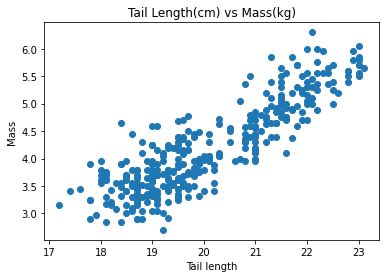

In [108]:
plt.scatter(data["Tail Length (cm)"], data["Mass (kg)"])
plt.title("Tail Length(cm) vs Mass(kg)")
plt.xlabel("Tail length")
plt.ylabel("Mass")
plt.show()

In [109]:
num = int(len(data)*0.8)
train = data[:num]
test = data[num:]
print('data: ', len(data))
print('Train: ', len(train))
print('Test: ', len(test))

data:  342
Train:  273
Test:  69


In [110]:
regr = linear_model.LinearRegression()
train_x = np.array(train[["Tail Length (cm)"]])
train_y = np.array(train[["Mass (kg)"]])
regr.fit(train_x, train_y)

LinearRegression()

In [111]:
coefficients = regr.coef_
intercept = regr.intercept_
print("Slope: ", coefficients)
print("Intercept: ", intercept)

Slope:  [[0.48913766]]
Intercept:  [-5.57328662]


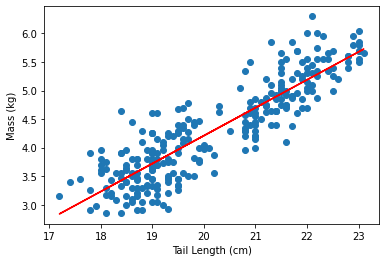

In [112]:
plt.scatter(train["Tail Length (cm)"], train["Mass (kg)"])
plt.plot(train_x, coefficients[0]*train_x + intercept, color ="red")
plt.xlabel("Tail Length (cm)")
plt.ylabel("Mass (kg)")
plt.show()